<a href="https://colab.research.google.com/github/Griff-Kaiga/week-6-IP/blob/master/Griffin_Kaiga_Moringa_School_Week_6_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

### a) Specifying the Question

You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

### b) Defining the Metric for Success


1.   Successfuly predicting home and away goals
2.   Developing a model with a high accuracy score
3.   



### c) Understanding the context 

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

In [1]:
# importing the relevant libraries to be used 
import pandas as pd
import seaborn as sns 
import seaborn as sb
import matplotlib.pyplot as plt
import datetime as dt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Loading the Dataset 1
# Dataset url = /content/fifa_ranking.csv
#
ranking = pd.read_csv('/content/fifa_ranking.csv')


In [3]:
# Loading the Dataset 2
# Dataset url = 
#
results = pd.read_csv('/content/results.csv')

## 3. Checking the Data

In [4]:
# Determining the no. of records in our dataset1
#
ranking.shape


(57793, 16)

In [5]:
# Determining the no. of records in our dataset 2
#
results.shape


(40839, 9)

In [6]:
# Previewing the top of our dataset 1
#
ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [7]:
# Previewing the bottom of our dataset 1
# 
ranking.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [8]:
# Previewing the top of our dataset 2
#
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [9]:
# Previewing the bottom of our dataset 2
# 
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [10]:
# splitting the rank_date column to month and 
ranking['rank_date'] = pd.to_datetime(ranking['rank_date'])
ranking['month'] = ranking['rank_date'].dt.month



ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,month
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,8
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,8
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,8
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,8
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,8


In [11]:
# splitting the rank date column to year and month separtely for dataset 1
ranking['year'] = ranking['rank_date'].dt.year
#ranking['year'] = pd.DatetimeIndex(ranking['rank_date']).year


ranking.head() 

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,month,year
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,8,1993
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,8,1993
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,8,1993
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,8,1993
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,8,1993


In [12]:
ranking.year.unique()

array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018])

In [13]:
# splitting the date column to date and month for dateset 2

results['date'] = pd.to_datetime(results['date'])
results['month'] = results['date'].dt.month


In [14]:
#splitting date into date and year dataset 2
results['year'] = results['date'].dt.year

results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,month,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,11,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,3,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,3,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,3,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,1876


In [15]:
results= results[results['year'].isin(ranking['year'].unique())]
results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,month,year
17361,1993-01-01,Ghana,Mali,1,1,Friendly,Libreville,Gabon,True,1,1993
17362,1993-01-02,Gabon,Burkina Faso,1,1,Friendly,Libreville,Gabon,False,1,1993
17363,1993-01-02,Kuwait,Lebanon,2,0,Friendly,Kuwait City,Kuwait,False,1,1993
17364,1993-01-03,Burkina Faso,Mali,1,0,Friendly,Libreville,Gabon,True,1,1993
17365,1993-01-03,Gabon,Ghana,2,3,Friendly,Libreville,Gabon,False,1,1993
...,...,...,...,...,...,...,...,...,...,...,...
40346,2018-12-30,Yemen,Syria,0,1,Friendly,Abu Dhabi,United Arab Emirates,True,12,2018
40347,2018-12-31,South Korea,Saudi Arabia,0,0,Friendly,Abu Dhabi,United Arab Emirates,True,12,2018
40348,2018-12-31,Kyrgyzstan,Palestine,2,1,Friendly,Doha,Qatar,True,12,2018
40349,2018-12-31,Philippines,Vietnam,2,4,Friendly,Doha,Qatar,True,12,2018


In [16]:
unique_yr =ranking['year'].unique()
unique_yr

array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018])

In [17]:
# Checking whether each column has an appropriate datatype
#
ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   rank                     57793 non-null  int64         
 1   country_full             57793 non-null  object        
 2   country_abrv             57793 non-null  object        
 3   total_points             57793 non-null  float64       
 4   previous_points          57793 non-null  int64         
 5   rank_change              57793 non-null  int64         
 6   cur_year_avg             57793 non-null  float64       
 7   cur_year_avg_weighted    57793 non-null  float64       
 8   last_year_avg            57793 non-null  float64       
 9   last_year_avg_weighted   57793 non-null  float64       
 10  two_year_ago_avg         57793 non-null  float64       
 11  two_year_ago_weighted    57793 non-null  float64       
 12  three_year_ago_avg       57793 n

In [18]:
# Checking whether each column has an appropriate datatype
#
results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22990 entries, 17361 to 40350
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        22990 non-null  datetime64[ns]
 1   home_team   22990 non-null  object        
 2   away_team   22990 non-null  object        
 3   home_score  22990 non-null  int64         
 4   away_score  22990 non-null  int64         
 5   tournament  22990 non-null  object        
 6   city        22990 non-null  object        
 7   country     22990 non-null  object        
 8   neutral     22990 non-null  bool          
 9   month       22990 non-null  int64         
 10  year        22990 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(4), object(5)
memory usage: 2.0+ MB


In [19]:
# merging the two datasets
merged_df = pd.merge(results, ranking, how = 'inner', left_on = ['home_team','year', 'month'], right_on = ['country_full','year', 'month'])
merged_df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,month,year,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,8,1993,19,Colombia,COL,0.00,36,16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08
1,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,Barranquilla,Colombia,False,8,1993,19,Colombia,COL,0.00,36,16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08
2,1993-08-29,Colombia,Peru,4,0,FIFA World Cup qualification,Barranquilla,Colombia,False,8,1993,19,Colombia,COL,0.00,36,16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08
3,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False,8,1993,70,Peru,PER,0.00,16,8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08
4,1993-08-08,Peru,Colombia,0,1,FIFA World Cup qualification,Lima,Peru,False,8,1993,70,Peru,PER,0.00,16,8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18604,2018-06-22,Nigeria,Iceland,2,0,FIFA World Cup,Volgograd,Russia,True,6,2018,48,Nigeria,NGA,617.79,635,-1,251.21,251.21,474.22,237.11,198.21,59.46,350.01,70.00,CAF,2018-06-07
18605,2018-06-26,Nigeria,Argentina,1,2,FIFA World Cup,St. Petersburg,Russia,True,6,2018,48,Nigeria,NGA,617.79,635,-1,251.21,251.21,474.22,237.11,198.21,59.46,350.01,70.00,CAF,2018-06-07
18606,2018-06-26,Australia,Peru,0,2,FIFA World Cup,Sochi,Russia,True,6,2018,36,Australia,AUS,718.33,700,4,366.60,366.60,387.55,193.77,327.21,98.16,298.94,59.79,AFC,2018-06-07
18607,2018-06-28,Senegal,Colombia,0,1,FIFA World Cup,Samara,Russia,True,6,2018,27,Senegal,SEN,837.98,825,1,368.23,368.23,537.34,268.67,280.30,84.09,584.93,116.99,CAF,2018-06-07


### a.Validation

## 5. Tidying the Dataset

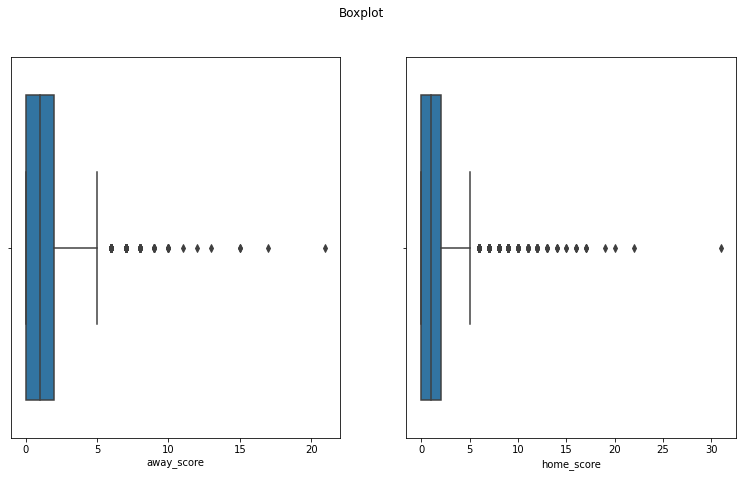

In [20]:
# checking for outliers
#
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 7))
fig.suptitle('Boxplot')
sns.boxplot(merged_df['away_score'], ax=ax1)
sns.boxplot(merged_df['home_score'], ax=ax2)


In [21]:
# Checking for Anomalies
#
print(ranking.nunique())
print(results.nunique())

rank                         209
country_full                 216
country_abrv                 216
total_points               11114
previous_points             1557
rank_change                  121
cur_year_avg                7419
cur_year_avg_weighted       7419
last_year_avg               7473
last_year_avg_weighted      7001
two_year_ago_avg            7575
two_year_ago_weighted       6513
three_year_ago_avg          7628
three_year_ago_weighted     5849
confederation                  6
rank_date                    286
month                         12
year                          26
dtype: int64
date          5511
home_team      295
away_team      289
home_score      23
away_score      21
tournament      74
city          1660
country        232
neutral          2
month           12
year            26
dtype: int64


In [22]:
# Dealing with the Missing Data
#
merged_df.isnull().sum()

date                       0
home_team                  0
away_team                  0
home_score                 0
away_score                 0
tournament                 0
city                       0
country                    0
neutral                    0
month                      0
year                       0
rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [23]:
# More data cleaning procedures
#
merged_df = merged_df.drop(columns=['date', 'rank_date','country_full', 'country_abrv', 'cur_year_avg_weighted', 'last_year_avg_weighted', 'two_year_ago_weighted','three_year_ago_weighted','city', 'confederation'])
merged_df.head()

,home_team,away_team,home_score,away_score,tournament,country,neutral,month,year,rank,total_points,previous_points,rank_change,cur_year_avg,last_year_avg,two_year_ago_avg,three_year_ago_avg
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,Colombia,False,8,1993,19,0.0,36,16,0.0,0.0,0.0,0.0
1,Colombia,Argentina,2,1,FIFA World Cup qualification,Colombia,False,8,1993,19,0.0,36,16,0.0,0.0,0.0,0.0
2,Colombia,Peru,4,0,FIFA World Cup qualification,Colombia,False,8,1993,19,0.0,36,16,0.0,0.0,0.0,0.0
3,Peru,Argentina,0,1,FIFA World Cup qualification,Peru,False,8,1993,70,0.0,16,8,0.0,0.0,0.0,0.0
4,Peru,Colombia,0,1,FIFA World Cup qualification,Peru,False,8,1993,70,0.0,16,8,0.0,0.0,0.0,0.0


In [ ]:
df = df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'})

pd.rename(total_points,	previous_points,	rank_change	cur_year_avg	last_year_avg	two_year_ago_avg	three_year_ago_avg)

In [24]:
# measures of central tendencies
merged_df.describe()

,home_score,away_score,month,year,rank,total_points,previous_points,rank_change,cur_year_avg,last_year_avg,two_year_ago_avg,three_year_ago_avg
count,18609.000000,18609.000000,18609.000000,18609.000000,18609.000000,18609.000000,18609.000000,18609.000000,18609.000000,18609.000000,18609.000000,18609.000000
mean,1.622817,1.074910,6.889462,2006.467784,77.831157,163.009199,425.994841,0.981998,82.733555,81.322463,78.258282,80.668365
std,1.660216,1.261695,3.285789,6.816722,51.263254,309.043083,316.326216,6.915482,162.736991,164.200012,158.369993,162.826843
min,0.000000,0.000000,1.000000,1993.000000,1.000000,0.000000,0.000000,-62.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,4.000000,2001.000000,34.000000,0.000000,164.000000,-2.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,7.000000,2007.000000,73.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,10.000000,2012.000000,114.000000,226.540000,609.000000,3.000000,101.140000,92.130000,83.140000,87.000000
max,31.000000,21.000000,12.000000,2018.000000,209.000000,1775.030000,1887.000000,73.000000,1158.660000,1169.570000,1153.120000,1200.770000


## 6. Exploratory Analysis

In [25]:
# determining kurtosis 
home_kurt=merged_df['home_score'].kurt()
away_kurt = merged_df['away_score'].kurt()
print(home_kurt)
print(away_kurt)

14.917851341994403
11.333177559130917


In [26]:
# determining skewness
home = merged_df['home_score'].skew()
print(home)
away = merged_df['away_score'].skew()
print(away)

2.401574101587397
2.1758283715007716


In [27]:
# checking count of each observation
print(merged_df.home_team.value_counts())
print(merged_df.away_team.value_counts())
print(merged_df.tournament.value_counts())

Mexico                      273
Japan                       236
Saudi Arabia                227
Qatar                       208
Oman                        205
                           ... 
Anguilla                     10
Montserrat                    9
Kosovo                        8
Gibraltar                     6
Turks and Caicos Islands      5
Name: home_team, Length: 193, dtype: int64
Zambia          191
Sweden          161
Paraguay        161
Brazil          160
Finland         159
               ... 
Tibet             1
Ynys Môn          1
Vatican City      1
Crimea            1
Frøya             1
Name: away_team, Length: 234, dtype: int64
Friendly                                7010
FIFA World Cup qualification            4269
UEFA Euro qualification                 1423
African Cup of Nations qualification     959
AFC Asian Cup qualification              427
                                        ... 
Dragon Cup                                 4
Copa del Pacífico          

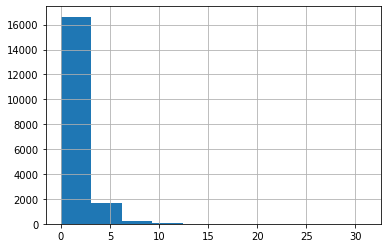

In [28]:
# hist plot for the home scores
merged_df['home_score'].hist()


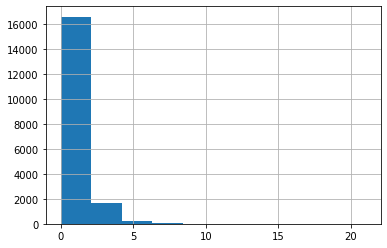

In [29]:
merged_df['away_score'].hist()

bivariate summaries

In [30]:
# obtaining the home score, away score, tournament
merged_df1 = merged_df[['home_score', 'away_score', 'tournament','rank']]
merged_df1

,home_score,away_score,tournament,rank
0,0,0,FIFA World Cup qualification,19
1,2,1,FIFA World Cup qualification,19
2,4,0,FIFA World Cup qualification,19
3,0,1,FIFA World Cup qualification,70
4,0,1,FIFA World Cup qualification,70
...,...,...,...,...
18604,2,0,FIFA World Cup,48
18605,1,2,FIFA World Cup,48
18606,0,2,FIFA World Cup,36
18607,0,1,FIFA World Cup,27


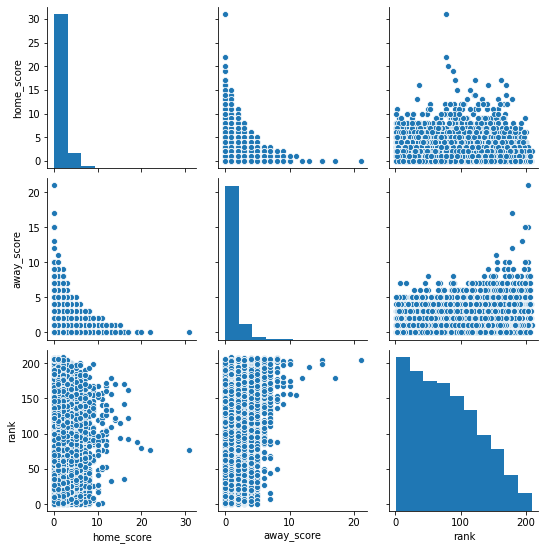

In [31]:
#plotting the bivariate summaries and recording the observations
sns.pairplot(merged_df1)
plt.show()

In [32]:
merged_df1.corr()

,home_score,away_score,rank
home_score,1.000000,-0.160455,-0.111440
away_score,-0.160455,1.000000,0.216275
rank,-0.111440,0.216275,1.000000


## 7. Implementing the Solution

In [50]:
# Import label encoder 
from sklearn import preprocessing 
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
# Encode labels in column 'result'. 


# Encode labels in column 'tournament'
merged_df['tournament']= label_encoder.fit_transform(merged_df['tournament']) 
merged_df['tournament'].unique()
# Encode labels in column 'total_points'
merged_df['total_points']= label_encoder.fit_transform(merged_df['rank']) 
merged_df['total_points'].unique()
# Encode labels in column cur_year_avg
merged_df['cur_year_avg']= label_encoder.fit_transform(merged_df['cur_year_avg']) 
merged_df['cur_year_avg'].unique()
# Encode labels in column last_year_avg
merged_df['last_year_avg']= label_encoder.fit_transform(merged_df['cur_year_avg']) 
merged_df['last_year_avg'].unique()
# Encode labels in column two_year_ago_avg
merged_df['two_year_ago_avg']= label_encoder.fit_transform(merged_df['cur_year_avg']) 
merged_df['two_year_ago_avg'].unique()
# Encode labels in column 'rank'
merged_df['rank']= label_encoder.fit_transform(merged_df['rank']) 
merged_df['rank'].unique()
# Encoding labels in columns 'neutral'
merged_df['neutral']= label_encoder.fit_transform(merged_df['neutral']) 
merged_df['neutral'].unique()
#Previewing the dataset
merged_df.head()

,home_team,away_team,home_score,away_score,tournament,country,neutral,month,year,rank,total_points,previous_points,rank_change,cur_year_avg,last_year_avg,two_year_ago_avg,three_year_ago_avg
0,Colombia,Paraguay,0,0,27,Colombia,0,8,1993,18,18,36,16,0,0,0,0.0
1,Colombia,Argentina,2,1,27,Colombia,0,8,1993,18,18,36,16,0,0,0,0.0
2,Colombia,Peru,4,0,27,Colombia,0,8,1993,18,18,36,16,0,0,0,0.0
3,Peru,Argentina,0,1,27,Peru,0,8,1993,69,69,16,8,0,0,0,0.0
4,Peru,Colombia,0,1,27,Peru,0,8,1993,69,69,16,8,0,0,0,0.0


In [51]:

# dropping columns that do not need
merged_df2 = merged_df.drop(columns=['year','country','home_team', 'away_team', 'previous_points',	'rank_change', 'three_year_ago_avg'])
merged_df2


,home_score,away_score,tournament,neutral,month,rank,total_points,cur_year_avg,last_year_avg,two_year_ago_avg
0,0,0,27,0,8,18,18,0,0,0
1,2,1,27,0,8,18,18,0,0,0
2,4,0,27,0,8,18,18,0,0,0
3,0,1,27,0,8,69,69,0,0,0
4,0,1,27,0,8,69,69,0,0,0
...,...,...,...,...,...,...,...,...,...,...
18604,2,0,26,1,6,47,47,1994,1994,1994
18605,1,2,26,1,6,47,47,1994,1994,1994
18606,0,2,26,1,6,35,35,2701,2701,2701
18607,0,1,26,1,6,26,26,2719,2719,2719


In [35]:
merged_df2.isnull().sum()

home_score          0
away_score          0
tournament          0
neutral             0
month               0
rank                0
total_points        0
cur_year_avg        0
last_year_avg       0
two_year_ago_avg    0
dtype: int64

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import numpy as np
# splitting our dataset
X= merged_df2.drop(['home_score'], axis=1)
y= merged_df2['home_score']
# Split the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=25)

# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 3) 
X_poly = poly_reg.fit_transform(X)
# creating a linear regression model
regressor = LinearRegression()
regressor.fit(X_poly, y)
#Visualize the Polynomial Regression results
y_Predict = regressor.predict(X_poly)
print(np.sqrt(mean_squared_error(y, y_Predict)))


      

1.6116737919929216


In [53]:
rmse = []
for i in range(2, 7):
  poly_reg = PolynomialFeatures(degree = i) 
  X_poly = poly_reg.fit_transform(X)
  # creating a linear regression model
  regressor = LinearRegression()
  regressor.fit(X_poly, y)
  #Visualize the Polynomial Regression results
  y_Predict = regressor.predict(X_poly)
  rmse_t = (np.sqrt(mean_squared_error(y, y_Predict)))
  rmse.append(rmse_t)

print(rmse)


[1.6212736717107477, 1.6116737919929216, 1.6027910299284724, 1.6213361682636007, 1.683342243968042]


In [56]:
# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_Predict, y)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()
#Our mean is close to 0, indicating that we tend to be fairly correct, although slightly over estimating chances by, on average, 0.012%

-0.00012074412338296209

In [42]:
# logistic regression
# dropping columns that do not need
merged_df2 = merged_df.drop(columns=['home_team', 'country', 'away_team', 'neutral', 'three_year_ago_avg', 'month', 'previous_points',	'rank_change', 'year'])
merged_df2

,home_score,away_score,tournament,rank,total_points,cur_year_avg,last_year_avg,two_year_ago_avg
0,0,0,27,18,18,0,0,0
1,2,1,27,18,18,0,0,0
2,4,0,27,18,18,0,0,0
3,0,1,27,69,69,0,0,0
4,0,1,27,69,69,0,0,0
...,...,...,...,...,...,...,...,...
18604,2,0,26,47,47,1994,1994,1994
18605,1,2,26,47,47,1994,1994,1994
18606,0,2,26,35,35,2701,2701,2701
18607,0,1,26,26,26,2719,2719,2719


In [43]:
# Implementing the Solution
# 
# Creating a function to be used to create a win, draw or lose column'
#'
merged_df2['score'] = merged_df2.home_score - merged_df2.away_score
def result(goals):
  if goals > 0:
    return 'Win'
  elif goals < 0:
    return 'Lose'
  else:
    return 'Draw'
# Applying the result function to the dataframe
#
merged_df2['result'] = merged_df2.score.apply(lambda x: result(x))
merged_df2
# Dropping the score column, as it has served its purpose
merged_df2.drop('score', axis = 1, inplace = True)
# Creating a column of total goals scored
#
merged_df2['total_goals'] = merged_df2.home_score + merged_df2.away_score

# Previewing
merged_df2

,home_score,away_score,tournament,rank,total_points,cur_year_avg,last_year_avg,two_year_ago_avg,result,total_goals
0,0,0,27,18,18,0,0,0,Draw,0
1,2,1,27,18,18,0,0,0,Win,3
2,4,0,27,18,18,0,0,0,Win,4
3,0,1,27,69,69,0,0,0,Lose,1
4,0,1,27,69,69,0,0,0,Lose,1
...,...,...,...,...,...,...,...,...,...,...
18604,2,0,26,47,47,1994,1994,1994,Win,2
18605,1,2,26,47,47,1994,1994,1994,Lose,3
18606,0,2,26,35,35,2701,2701,2701,Lose,2
18607,0,1,26,26,26,2719,2719,2719,Lose,1


In [44]:
# splitting our dataset
X = merged_df2.drop('result', axis=1)
y = merged_df2['result']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=25)

In [45]:
# Fitting our model
# 
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)

In [47]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

# The results from the confusion matrix tell us that 868, 1918, and 3509 are the number of correct predictions. 


array([[ 374,  174,  372],
       [  53,  864,  124],
       [ 211,    0, 1550]])

In [48]:
accuracy_score= (374+ 864+ 1550)/len(y_pred)
accuracy_score

0.7490596453519613

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [ ]:
# Reviewing the Solution 
#

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?